### Loading data

Below we have the code that retrieves the data from the  Mechanical Turk Tracker Demographics API.

In [5]:
import pandas as pd
df = pd.read_csv("mturk_surveys.csv")
df.drop(df.columns[0], axis=1, inplace=True) # drop the "index" column
# We now transform our API answer into a flat table
# and set the right data types
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = df['hit_answered_date'].apply(lambda x : x.date())
df['time'] = df['hit_answered_date'].apply(lambda x : x.time())
df.dtypes

gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                               object
time                               object
dtype: object

In [6]:
import datetime
minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])
days = (maxDate - minDate).days
print(minDate)
print(maxDate)
print(days)

2015-03-26 11:47:28.877000
2017-06-17 02:38:50.413000
813


In [7]:
from time import gmtime, strftime
def t():
    print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
    

In [8]:
df.head(5)

,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth,date,time
0,female,2017-06-17 02:38:50.413,2017-06-17 02:35:15,"$25,000-$39,999",2,chicago,US,il,married,215.0,abdb4a49fa215a85850ca6b53273f9b6,1961,2017-06-17,02:38:50.413000
1,male,2017-06-17 02:24:05.938,2017-06-17 02:20:13,"$100,000 or more",2,des moines,US,ia,cohabitating,232.0,1e31723e90a79fe2c3028fa9be9cf3c1,1981,2017-06-17,02:24:05.938000
2,female,2017-06-17 02:15:22.549,2017-06-17 01:35:17,"$60,000-$74,999",2,tampa,US,fl,married,2405.0,bf977b75ea523d069c2a1d842d3834cf,1992,2017-06-17,02:15:22.549000
3,female,2017-06-17 02:13:46.783,2017-06-17 02:05:14,"$15,000-$24,999",3,wilmington,US,de,single,512.0,9fb008169ac71be7b23798754c4432f4,1995,2017-06-17,02:13:46.783000
4,male,2017-06-17 02:03:30.117,2017-06-17 01:50:17,"$40,000-$59,999",2,latrobe,US,pa,cohabitating,793.0,17cf9f32fdf07181fb90d63352a3ce5e,1986,2017-06-17,02:03:30.117000


### Exploratory plots

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
mpl.rc("figure", figsize=(16, 8))

### New Worker IDs discovered

In [10]:
def getWorkerIDs(df, startDate, endDate):
    '''
    Returns the set of distinct workers that participated in the surveys between the two dates
    '''
    return set(df["worker_id"][(df['hit_answered_date']>=startDate) & (df['hit_answered_date']<endDate)])


In [11]:
dates = sorted(set(df['date']))

results = []
for d in dates:
    w = len(getWorkerIDs(df, minDate, d))
    results.append( {'date':d, 'workers': w})

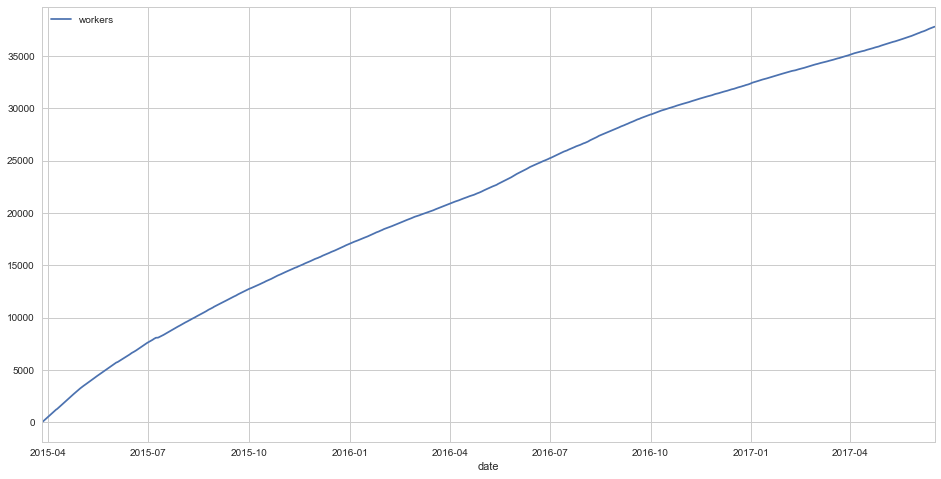

In [14]:
    
workers = pd.DataFrame(results)
workers.set_index('date', inplace = True)
workers.plot()

### Selection bias

The analysis above indicated that we should expect to see around 10K-15K workers on Mechanical Turk, with an average half-life of around a year and a half. Over the last two years, this means around 35K-40K workers total. 

Out of these workers , every month, we survey around $24*4*30 \approx 3K$ workers, for a total of around 80K surveys so far.

If every worker had uniform chance of participating, we would have expected that on average we would see each worker twice.





In [15]:
len(df)

79932

In [16]:
# How often do we see each worker?
df['worker_id'].value_counts()

52629358bb4b600cd895af4db743e93a    34
6debc0eceec45c93a8ad66f0359985d2    27
b2eb9a410e941c1325823ecbceaef077    27
8d581e715b2ca964b55dc6ec3a02f7bc    27
f5897a5c69cd5c423a68fa0197ee0494    26
5b044cf509da1d8444b6f60c465240ef    26
217879bd34b347905ace684b75025c31    26
b1f852d1ef0dfceda899291ab02cc02a    26
1eea49ef4ad993a73014bd8f43a8064f    26
51ae3104189737180aa3e0bb89f9010c    26
94ecb8b915f9c6b5ed89678d78dba6f1    26
98a18b3a53eb273babecb5ff88bee6dc    26
9209bd16839ff33192078642796f4bfe    26
b5dc717d9945a468fb14ae696303ef49    26
1e4879a728be7fae0d8181abaea1130c    26
e5c4b601c2c07256dc55d8f631f73435    26
cc15e2c74af011007361cef2b44fd33f    26
d0affb3378f77c9500772f1d90efb7a1    26
2f78fc62fa7c0751776991010210fcdd    25
8c23a41762a5cf37dcf6f9563ea1a054    25
a82df0f35d79cb92b986f092f88854b8    25
49f024fa54e56dc620653bac007e88ca    25
f04872a22a48af0c0c6bcdf02c4a8b59    25
8e4ce5263b2b43ec70f532b6d58522f8    25
9a62370e8624c6a4042f8be623a03bce    25
a950480dc6dfc26d05a482ac8

In [19]:
# Let's compute the frequency of captures
x = df['worker_id'].value_counts().value_counts()
x

1     25070
2      5642
3      2364
4      1274
5       790
6       564
7       429
8       324
9       239
10      199
11      157
12      134
13       98
14       93
16       83
15       72
18       56
17       53
19       37
20       36
21       36
22       21
23       21
26       14
24       11
25        9
27        3
34        1
Name: worker_id, dtype: int64

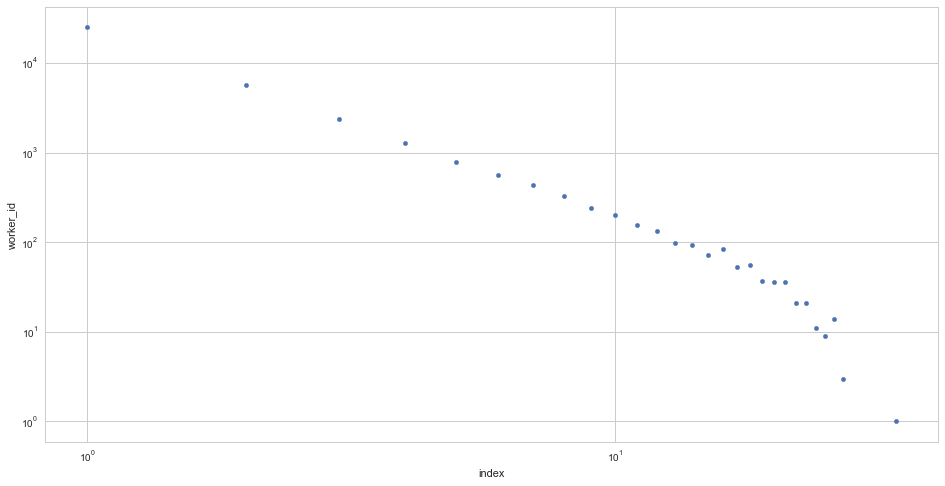

In [20]:
cnt = pd.DataFrame(x).reset_index()
cnt.plot.scatter(x='index', y='worker_id', logy=True, logx=True)

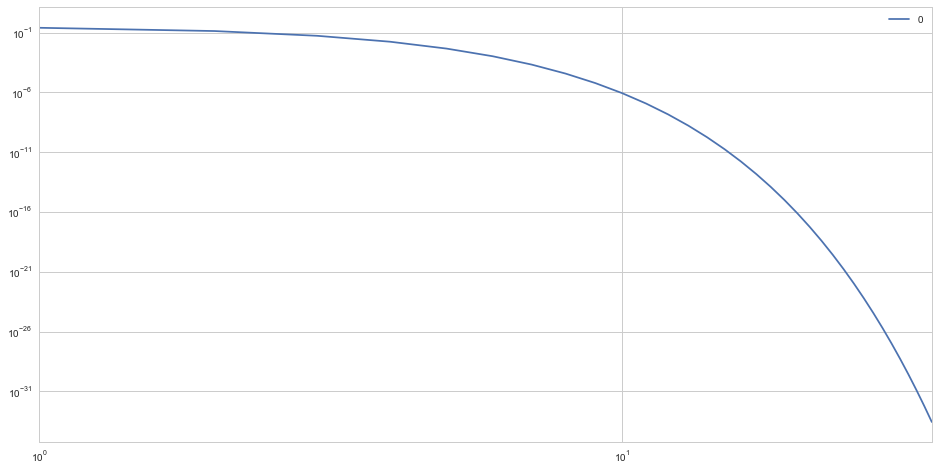

In [21]:
import scipy, scipy.stats
x = scipy.linspace(1,35,35)
pmf = scipy.stats.binom.pmf(x,80000,1/50000)
df_binom = pd.DataFrame(pmf)
df_binom.plot(logy=True, logx=True)

In [22]:
x = df['worker_id'].value_counts().value_counts(normalize=True).sort_index()
x

1     0.662702
2     0.149141
3     0.062490
4     0.033677
5     0.020883
6     0.014909
7     0.011340
8     0.008565
9     0.006318
10    0.005260
11    0.004150
12    0.003542
13    0.002591
14    0.002458
15    0.001903
16    0.002194
17    0.001401
18    0.001480
19    0.000978
20    0.000952
21    0.000952
22    0.000555
23    0.000555
24    0.000291
25    0.000238
26    0.000370
27    0.000079
34    0.000026
Name: worker_id, dtype: float64

In [23]:
x.index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 34])

In [24]:
for i in x.index.values:
    try:
        print(i+1,x[i+1]/x[i])
    except:
        pass

2 0.225049860391
3 0.419000354484
4 0.538917089679
5 0.620094191523
6 0.713924050633
7 0.760638297872
8 0.755244755245
9 0.737654320988
10 0.832635983264
11 0.788944723618
12 0.853503184713
13 0.731343283582
14 0.948979591837
15 0.774193548387
16 1.15277777778
17 0.638554216867
18 1.05660377358
19 0.660714285714
20 0.972972972973
21 1.0
22 0.583333333333
23 1.0
24 0.52380952381
25 0.818181818182
26 1.55555555556
27 0.214285714286


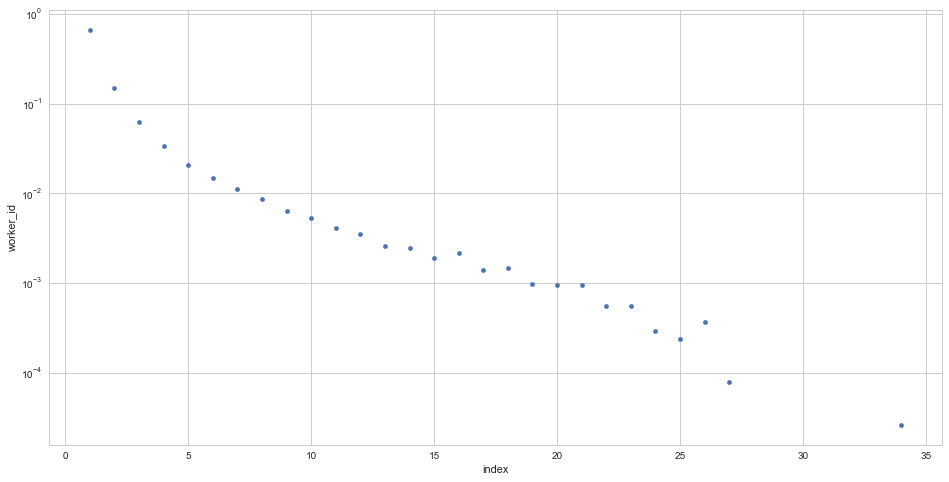

In [25]:
df['worker_id'].value_counts().value_counts(normalize=True).sort_index().reset_index().plot.scatter(x='index', y='worker_id', logy=True)

### Activity Parameter

We now add one parameter in our model, to capture the fact that activity in the platform is not equal among all workers.

In most online platforms, activity follows a power-law distribution: Most people participate occassionally, but a small number of users are active substantially more. 

We endow each of our user with an activity parameter $a$, which defines the fraction of time units that the user devotes in the platform. We asumme that $a$ is power-law distributed, based on evidence from other online platforms, and from our numbers above. Assuming that a user is active a minimum of $x_{min}$ and a maximum of $x_{max}$ time units, we have that the probability distribution of the activity parameters for the workers follows the distribution:

* pdf: $p(a=x) = C \cdot x^\alpha$, with $C=(\alpha-1) / (x_{max}^{\alpha-1} - x_{min}^{\alpha-1})$

* CDF: $P(x>a) =  (x^{\alpha-1} - x_{min}^{\alpha-1}) /  (x_{max}^{\alpha-1} - x_{min}^{\alpha-1})$

$E[x] = \frac{\alpha − 1}{\alpha - 2}$ for $\alpha>2$. See http://tuvalu.santafe.edu/~aaronc/courses/7000/csci7000-001_2011_L2.pdf (Eq 3) and http://up-rs-esp.github.io/bpl/

So, if we have a population of $N$ users (not all of them active at the same time, though), at any given minute, we can expect $N \frac{\alpha − 1}{\alpha - 2}$ of them to be available for sampling at any given moment, and our estimates need to be adjusted by multiplying our earlier estimates with  $\frac{\alpha − 2}{\alpha - 1}$.

In [ ]:
import math

def pdf(x,a, x_min, x_max):
    b = 1-a
    return  (b * math.pow(x, -a)) /  ((math.pow(x_max, b) - math.pow(x_min, b)))

def cdf(x,a, x_min, x_max):
    b = 1-a
    return  (math.pow(x,b)- math.pow(x_min, b)) /  (math.pow(x_max, b) - math.pow(x_min, b))

a, xmin , xmax = 3.25, 1, 100
points = []
for x in range(xmin, xmax+1):
    points.append( {'x': x/xmax, 'cdf': 1-cdf(x, a, xmin, xmax), 'pdf': pdf(x, a, xmin, xmax)})
    
pdf = pd.DataFrame(points)
pdf.set_index('x')['cdf'].plot(logx=True, logy=True)

#### Generally-active vs Active-now population

If we pick a random time to sample, then the probability that a user is active is given by $\frac{a}{a_{max}}\cdot p(a)$, where $a$ is the level of activity for that user, and $p(a)$ is the probability that a user has such an activity level.

Integrating over all activity values:

$\int_{a_{min}}^{a_{max}} \left(\frac{a}{a_{max}}\right)^2 p(a) da$

= (\alpha-1)/(\alpha-2) 

#### Appearance in two samples

So for a random user, we know that $p(a)$ is the probability of having activity level $a$, and the probability of the user being active in two sampling periods is $\left(\frac{a}{a_{max}}\right)^2$.

Integrating over all activity values:

$\int_{a_{min}}^{a_{max}} \left(\frac{a}{a_{max}}\right)^2 p(a) da$